<h1>Question 2</h1>

<p>2. A team of plantation planners are concerned about the yield of oil palm trees, which seems to fluctuate. They have collected a set of data and needed help in analysing on how external factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of oil palm tree determines the FFB yield, and are linked to the external factors. Perform the analysis, which requires some study on the background of oil palm tree physiology.
(refer attachment palm_ffb.csv)</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("palm_ffb.csv")

In [3]:
# display first 5 rows
df.head(5)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [4]:
df.shape

(130, 9)

In [5]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [6]:
df.isnull().any()

Date             False
SoilMoisture     False
Average_Temp     False
Min_Temp         False
Max_Temp         False
Precipitation    False
Working_days     False
HA_Harvested     False
FFB_Yield        False
dtype: bool

The dataset has 9 columns and 130 rows. There is no missing values in the dataset. 

In [7]:
# compute correlation
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


FFB_Yield has stronger positive correlation with Precipitation, and weaker positive correlation with Min_Temp and Working_days. FFB_Yield has stronger  negative correlation to HA_Harvested, and weaker negative correlation to SoilMoisture, Average_Temp and Max_Temp.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1d67e9f290>,
      dtype=object)

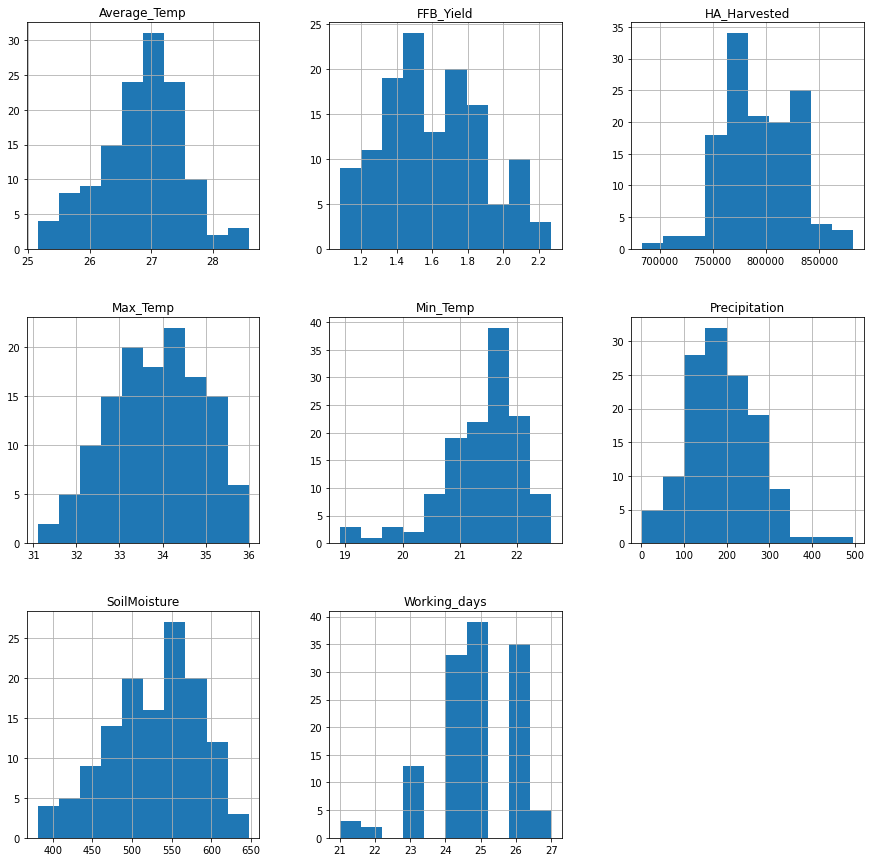

In [8]:
# histogram
df.hist(figsize=(15,15))

In [9]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='right', va='baseline', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

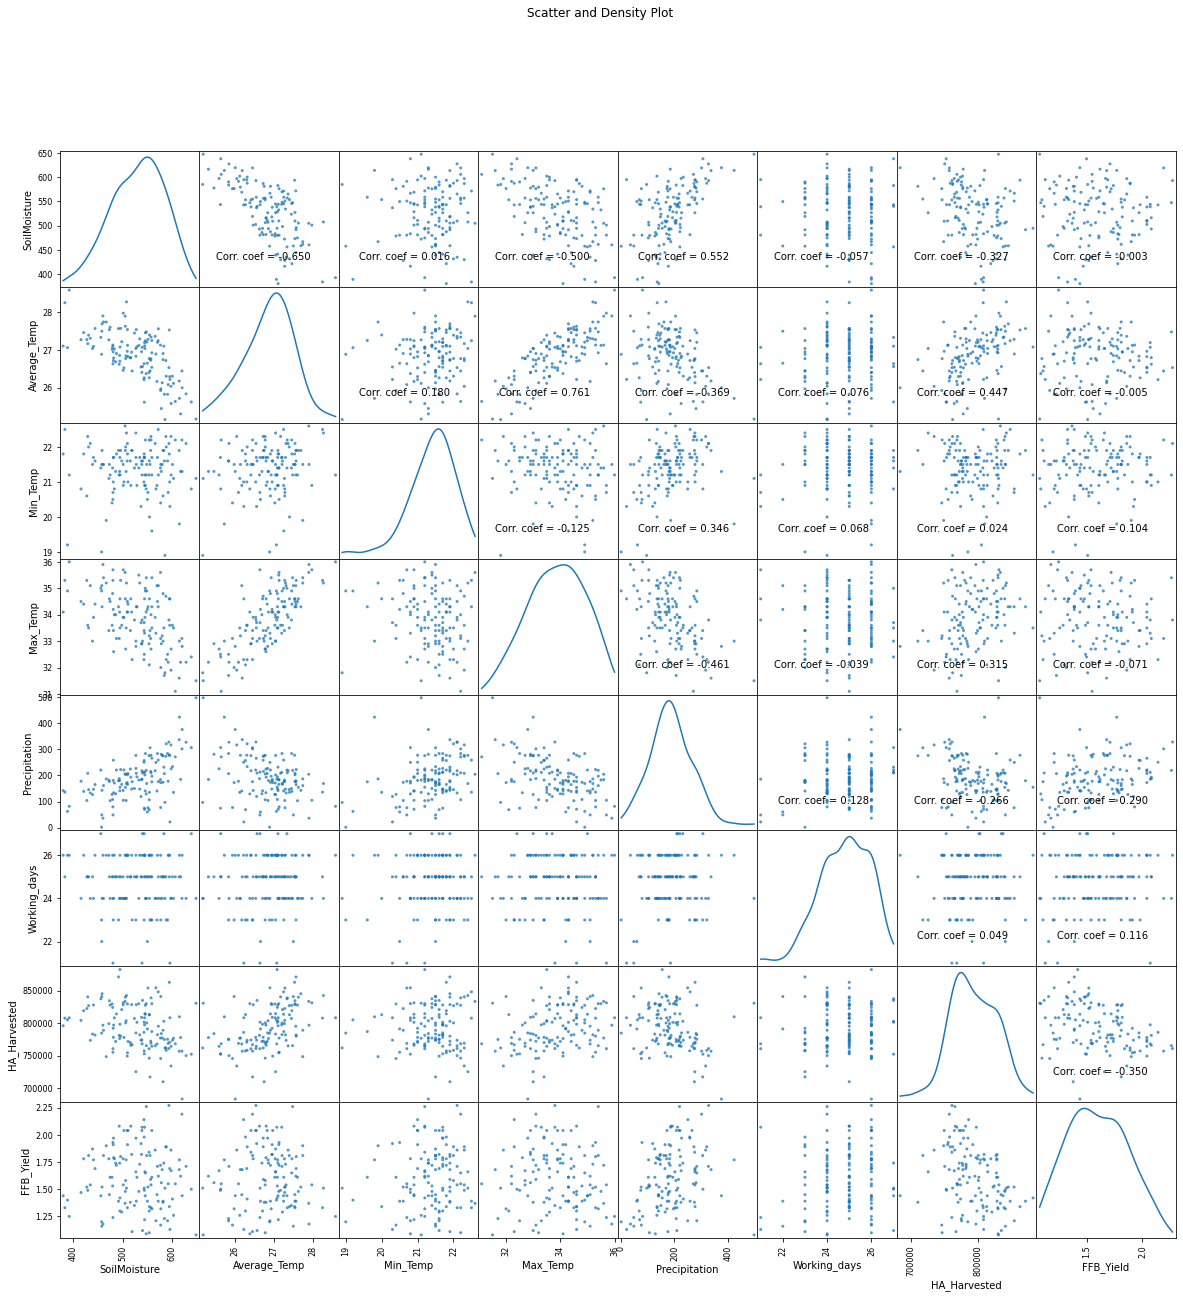

In [10]:
plotScatterMatrix(df, 20, 10)

<b>Feature Importance Computation using DecisionTreeRegressor and RandomForestRegressor </b>

In [11]:
X = df.drop(['FFB_Yield','Date'],axis=1) 
y = df.FFB_Yield  

In [12]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)

DecisionTreeRegressor()

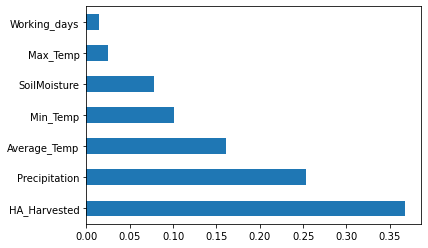

               Importance
HA_Harvested     0.367896
Precipitation    0.252857
Average_Temp     0.160603
Min_Temp         0.101374
SoilMoisture     0.077944
Max_Temp         0.025277
Working_days     0.014050


In [13]:
importance = pd.DataFrame(model.feature_importances_ ,columns = ['Importance'],index = X.columns)
importance = importance.sort_values(['Importance'], ascending = False)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

print(importance)

For decision tree regressor model, HA_Harvested, Precipitation and Average_Temp are the top 3 important features. 

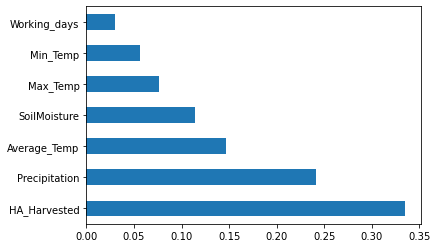

               Importance
HA_Harvested     0.335207
Precipitation    0.240999
Average_Temp     0.146793
SoilMoisture     0.114213
Max_Temp         0.076257
Min_Temp         0.056056
Working_days     0.030474


In [14]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = pd.DataFrame(model.feature_importances_ ,columns = ['Importance'],index = X.columns)
importance = importance.sort_values(['Importance'], ascending = False)

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

print(importance)

For Random Forest Regressor model, HA_Harvested, Precipitation and Average_Temp are also the top 3 important features. 

<b>Summary:</b>
<ul><li> According to correlation analysis, FFB_Yield has stronger positive correlation with Precipitation, and weaker positive correlation with Min_Temp and Working_days. </li>
<li>According to correlation analysis, FFB_Yield has stronger negative correlation with HA_Harvested, and weaker negative correlation with SoilMoisture, Average_Temp and Max_Temp. </li>
<li>From feature importance analysis of decision tree and random forest model, HA_Harvested, Precipitation and Average_Temp are the top 3 important features affecting FFB_Yield. While SoilMoisture, Max_Temp, Min_Temp and Working_days are of lesser importances. </li></ul>